# Weather forecast in Australia

About Dataset
Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

### Import relevant libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### Read Data, display basic info 

In [2]:
df = pd.read_csv('weatherAUS.csv')
display(df.head())
df.info()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Data Audit Table

In [3]:
#Create column name as index and data type column
data_audit = pd.DataFrame(df.dtypes, columns=['data_type'])

In [4]:
#Create target column, if 0, row is not a target if 1, row is a target
data_audit['target'] = 0 
data_audit.loc[data_audit.index == 'RainTomorrow', 'target'] = 1

In [5]:
descriptions = ['The date of observation',
 'The common name of the location of the weather station',
 'The minimum temperature in degrees celsius',
 'The maximum temperature in degrees celsius',
 'The amount of rainfall recorded for the day in mm',
 'The so-called Class A pan evaporation (mm) in the 24 hours to 9am',
 'The number of hours of bright sunshine in the day',
 'The direction of the strongest wind gust in the 24 hours to midnight',
 'The speed (km/h) of the strongest wind gust in the 24 hours to midnight',
 'Direction of the wind at 9am',
 'Direction of the wind at 3pm',
 'Wind speed (km/hr) averaged over 10 minutes prior to 9am',
 'Wind speed (km/hr) averaged over 10 minutes prior to 3pm',
 'Humidity (percent) at 9am',
 'Humidity (percent) at 3pm',
 'Atmospheric pressure (hpa) reduced to mean sea level at 9am',
 'Atmospheric pressure (hpa) reduced to mean sea level at 3pm',
 "Fraction of sky obscured by cloud at 9am. This is measured in 'oktas', which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.",
 "Fraction of sky obscured by cloud (in 'oktas': eighths) at 3pm. See Cload9am for a description of the values",
 'Temperature (degrees C) at 9am',
 'Temperature (degrees C) at 3pm',
 'yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No',
 "The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the 'risk'."]

#Create a data description column
data_audit['description'] = descriptions

In [6]:
#Create a column with missing data in %
data_audit['missing_data'] = np.round((df.isna().sum() / len(df)) *100,2)

In [7]:
#Create a type data classifying data into date, categorical or quantitative
data_audit.loc[data_audit['data_type'] == 'float64', 'type'] = 'quantitative'
data_audit.loc[data_audit['data_type'] == 'object', 'type'] = 'categorical'
data_audit.loc[data_audit.index == 'Date', 'type'] = 'date'

In [8]:
#Create a column which describe categories 
locations = f'{df.Location.unique()}'
wind_gust_dir = f'{df.WindGustDir.unique()}'
wind_9am = f'{df.WindDir9am.unique()}'
wind_3pm = f'{df.WindDir3pm.unique()}'
data_audit.loc[data_audit.index == 'Location', 'category'] = locations
data_audit.loc[data_audit.index == 'WindGustDir', 'category'] = wind_gust_dir
data_audit.loc[data_audit.index == 'WindDir9am', 'category'] = wind_9am
data_audit.loc[data_audit.index == 'WindDir3pm', 'category'] = wind_3pm
data_audit.loc[data_audit.index == 'RainToday', 'category'] = "['Yes', 'No']"
data_audit.loc[data_audit.index == 'RainTomorrow', 'category'] = "['Yes', 'No']"

In [9]:
#Create comment column 
data_audit.loc[data_audit.index == 'Date', 'comment'] = "Should be datetime"
data_audit.loc[data_audit.index == 'Evaporation', 'comment'] = "43% missing !"
data_audit.loc[data_audit.index == 'Sunshine', 'comment'] = "48% missing !"
data_audit.loc[data_audit.index == 'Cloud9am', 'comment'] = "38% missing !"
data_audit.loc[data_audit.index == 'Cloud3pm', 'comment'] = "41% missing !"

In [10]:
#Display data_audit and descriptive statistics 
display(data_audit)

,data_type,target,description,missing_data,type,category,comment
Date,object,0,The date of observation,0.00,date,NaN,Should be datetime
Location,object,0,The common name of the location of the weather...,0.00,categorical,['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbou...,NaN
MinTemp,float64,0,The minimum temperature in degrees celsius,1.02,quantitative,NaN,NaN
MaxTemp,float64,0,The maximum temperature in degrees celsius,0.87,quantitative,NaN,NaN
Rainfall,float64,0,The amount of rainfall recorded for the day in mm,2.24,quantitative,NaN,NaN
Evaporation,float64,0,The so-called Class A pan evaporation (mm) in ...,43.17,quantitative,NaN,43% missing !
Sunshine,float64,0,The number of hours of bright sunshine in the day,48.01,quantitative,NaN,48% missing !
WindGustDir,object,0,The direction of the strongest wind gust in th...,7.10,categorical,['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan...,NaN
WindGustSpeed,float64,0,The speed (km/h) of the strongest wind gust in...,7.06,quantitative,NaN,NaN
WindDir9am,object,0,Direction of the wind at 9am,7.26,categorical,['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan ...,NaN


In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Distributions of variables 

Let's first look at the exact time frame we are looking and also tranform the date into a datetime format

In [12]:
df.Date = pd.to_datetime(df.Date)

In [13]:
display(df.Date.min())
display(df.Date.max())
print("Our data looks at the time period from 2007 to 2017")

Timestamp('2007-11-01 00:00:00')

Timestamp('2017-06-25 00:00:00')

Our data looks at the time period from 2007 to 2017


Now first look at extreme values, we will use the following definition of extreme values
An extreme value (or outlier) is any value 
        above  𝑄3+1.5∗(𝑄3−𝑄1)
        below  𝑄1−1.5∗(𝑄3−𝑄1)

In [14]:
q1 = df.iloc[:,2:21].quantile(0.25)
q3 = df.iloc[:,2:21].quantile(0.75)
threshold_low = q1 - 1.5*(q3-q1)
threshold_high  = q3 + 1.5*(q3-q1)
df_extreme_val = pd.DataFrame(q1)
df_extreme_val['q3'] = q3
df_extreme_val['threshold_low'] = threshold_low 
df_extreme_val['threshold_high'] = threshold_high
df_extreme_val['extreme_low_count'] = df.iloc[:,2:21][df.iloc[:,2:21] < threshold_low].count()
df_extreme_val['extreme_above_count'] = df.iloc[:,2:21][df.iloc[:,2:21] > threshold_high].count()
df_extreme_val

/tmp/ipykernel_2013539/3628110904.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.iloc[:,2:21].quantile(0.25)
/tmp/ipykernel_2013539/3628110904.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.iloc[:,2:21].quantile(0.75)
/tmp/ipykernel_2013539/3628110904.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_extreme_val['extreme_low_count'] = df.iloc[:,2:21][df.iloc[:,2:21] < threshold_low].count()
/tmp/ipykernel_2013539/3628110904.py:10: FutureW

,0.25,q3,threshold_low,threshold_high,extreme_low_count,extreme_above_count
MinTemp,7.6,16.9,-6.35,30.85,46,8
MaxTemp,17.9,28.2,2.45,43.65,320,169
Rainfall,0.0,0.8,-1.20,2.00,0,25578
Evaporation,2.6,7.4,-4.60,14.60,0,1995
Sunshine,4.8,10.6,-3.90,19.30,0,0
WindGustSpeed,31.0,48.0,5.50,73.50,0,3092
WindSpeed9am,7.0,19.0,-11.00,37.00,0,1817
WindSpeed3pm,13.0,24.0,-3.50,40.50,0,2523
Humidity9am,57.0,83.0,18.00,122.00,1425,0
Humidity3pm,37.0,66.0,-6.50,109.50,0,0


Rainfall, Evaporation, all the Wind related variables have a lot of extreme values on the higher end 
Humidity has a lot of extreme values on the lower end. 

The Rainfall variable really sticks out with 255578 extreme values on the higher end.

Maybe that's is linked to the fact that in this table we take into account the values where Rainfall is 0. If for example we have more days without rainfall than days with rainfall, it is normal to see a lot of extreme values. 
We have too look closer at the Rain variables

Let's look at the distribution of the quantitative variables by creating some histograms.

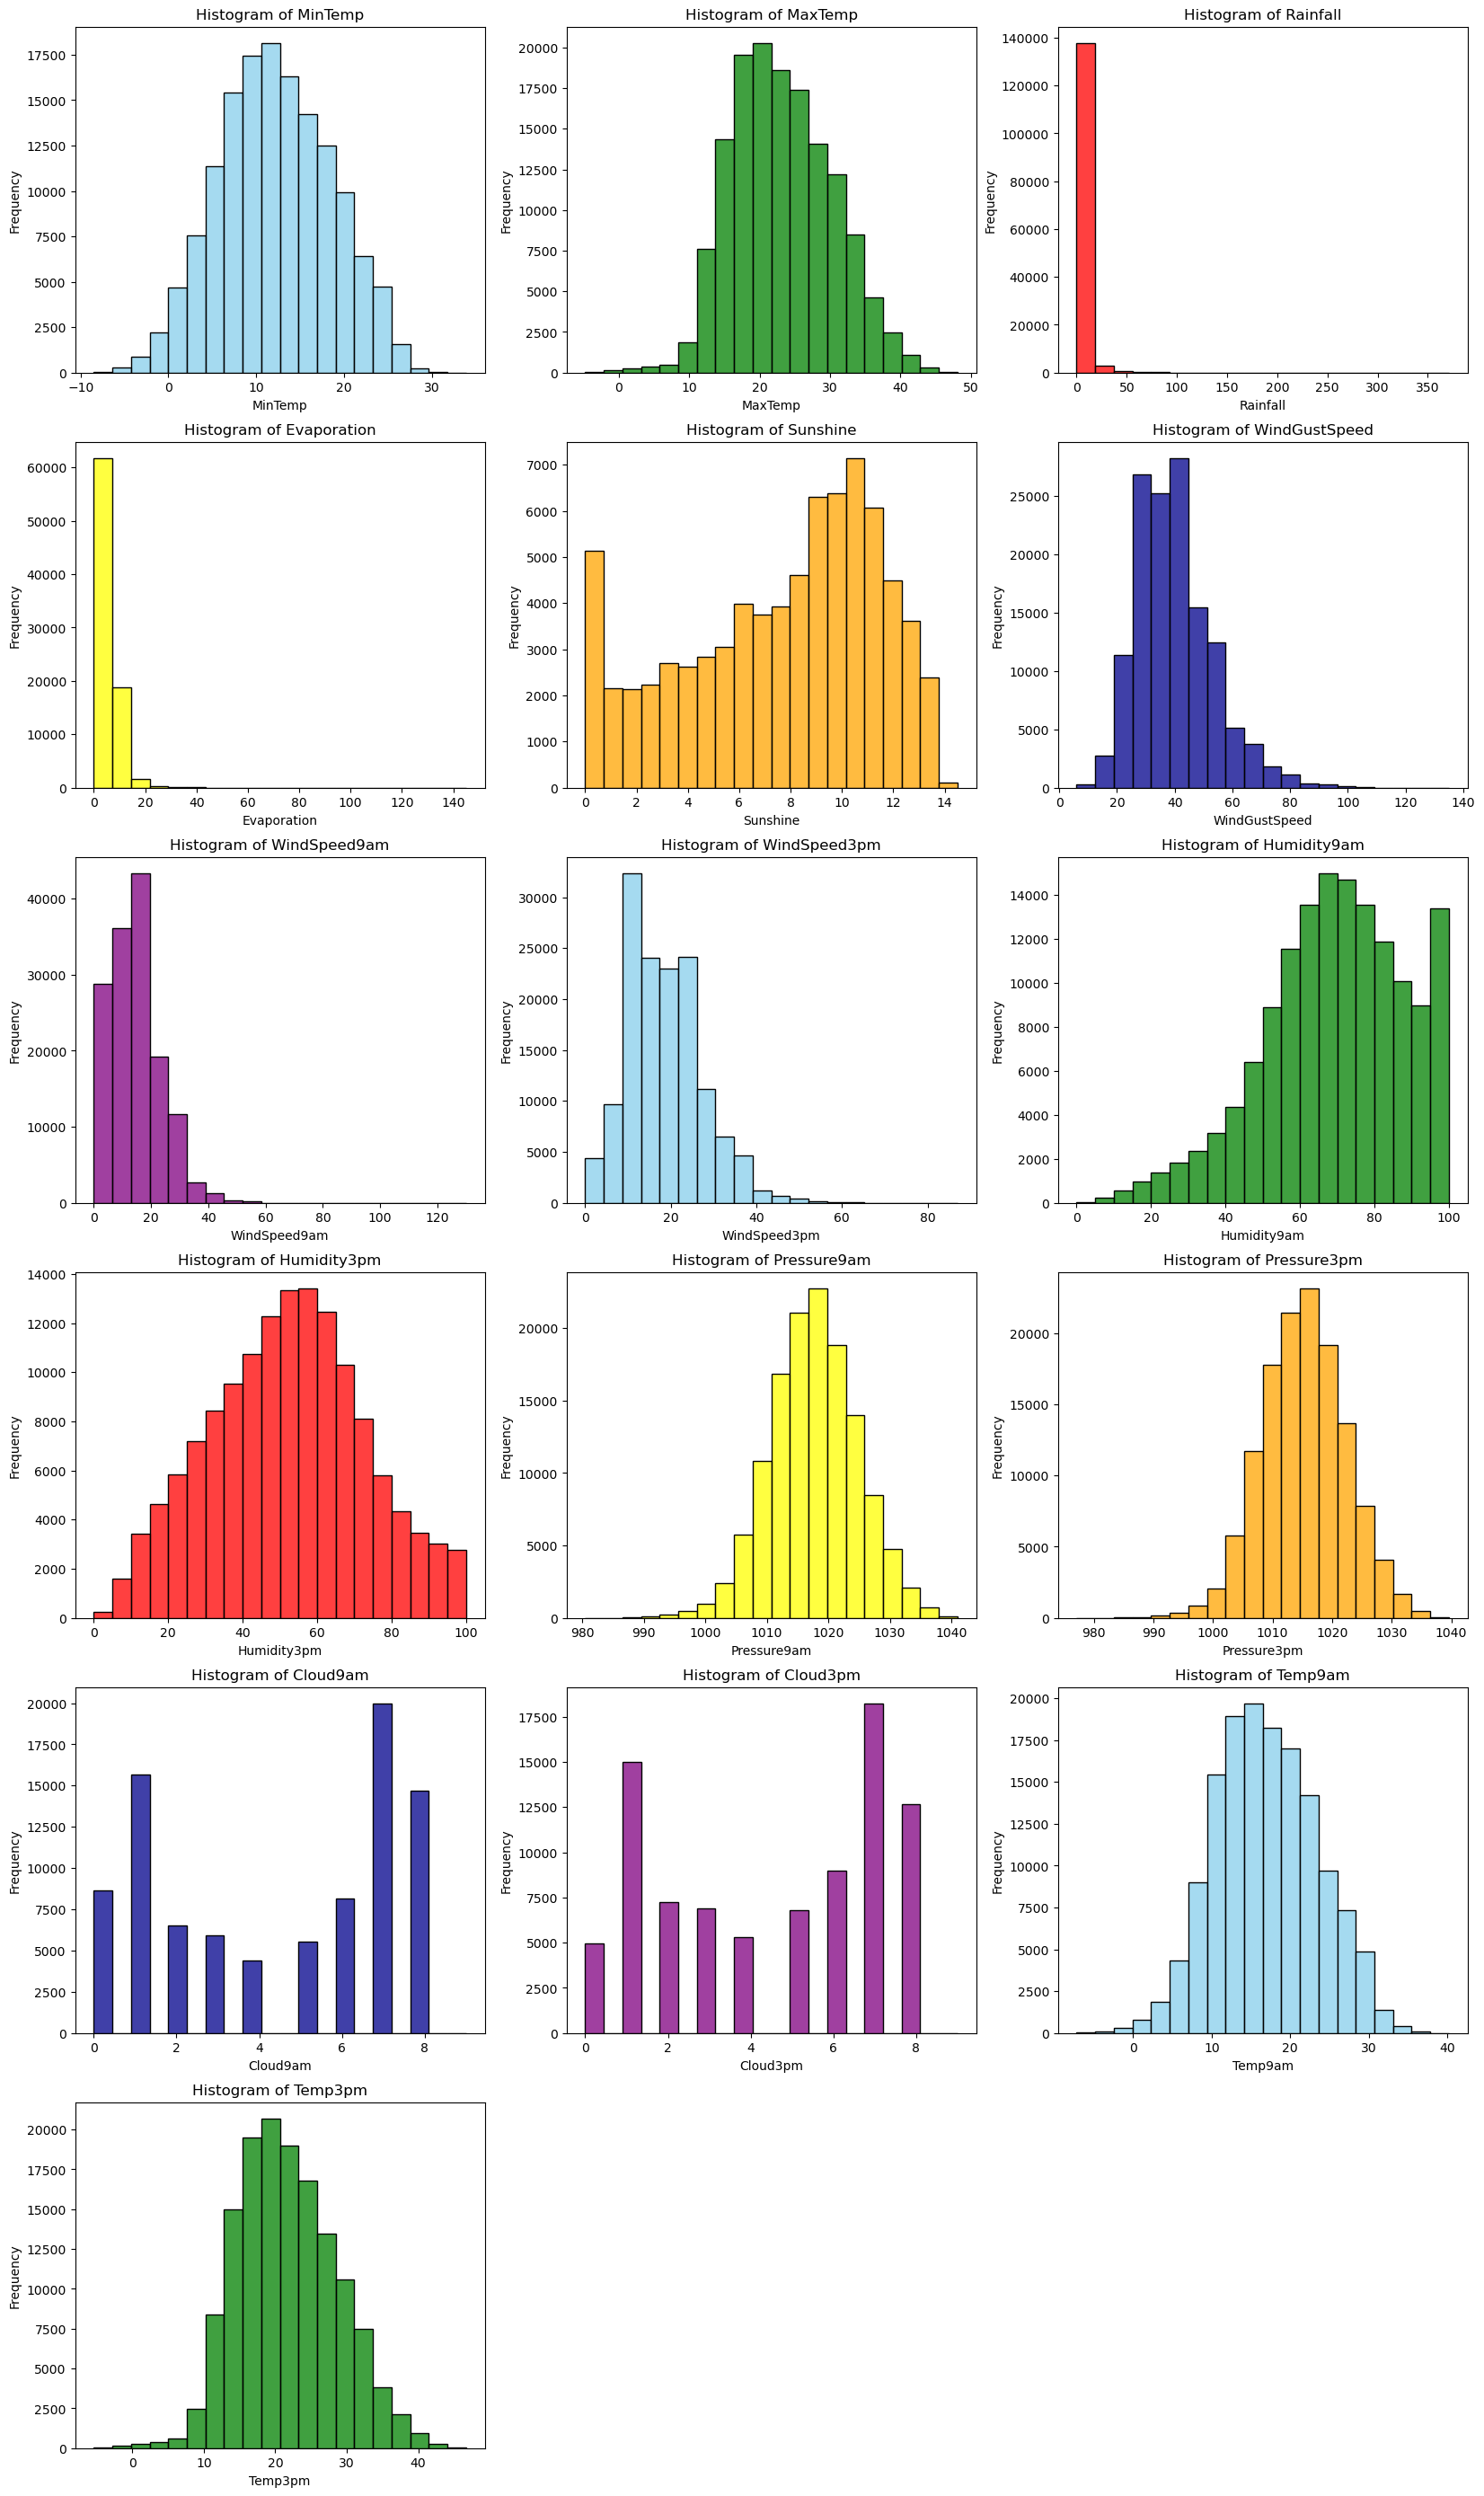

In [104]:
df_float = df.select_dtypes(include=['float'])
df_float = df_float.drop(columns=['RainToday', 'RainTomorrow'])
colors = ['skyblue', 'green', 'red', 'yellow', 'orange', 'darkblue', 'purple','skyblue', 'green', 'red', 'yellow', 'orange', 'darkblue', 'purple', 'skyblue', 'green', 'red', 'yellow', 'orange', 'darkblue', 'purple']
plt.figure(figsize=(20, 35))
for i,column in enumerate(df_float.columns):
    plt.subplot(6, 3,i+1)
    sns.histplot(df_quantiative[column], bins=20, color=colors[i])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

To check 
Cloud data -> missing data for certain locations, years ? 

We can see that the distributions for rainfall and evaporation look very skewed concentrated on the lower end. Rainfall is one of the variables that defines our target variable RainTomorrow. 

So let's look at RainTomorrow and Rainfall more closely.

In [99]:
display(df.RainTomorrow.value_counts())

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

Over the whole period of time it seems that Australia had more days without rain than with rain. 
Let's look at the rain days per month. For that we have to transform the variable RainTomorrow and create a new variable month 

In [16]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
display(df.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12,2008


In [17]:
rain_by_month = df.groupby('Month').aggregate({'RainTomorrow': 'sum'})
rain_by_month

,RainTomorrow
Month,
1,2498.0
2,2207.0
3,2781.0
4,2463.0
5,2941.0
6,3244.0
7,3171.0
8,2970.0
9,2606.0


Most of the rain days seem to be in the summer


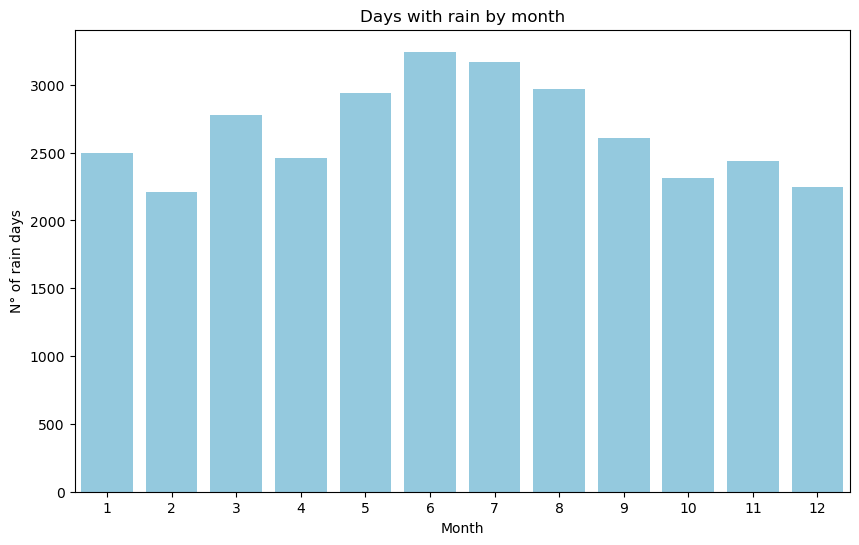

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_by_month.index, y='RainTomorrow', data=rain_by_month, color='skyblue')
plt.title('Days with rain by month')
plt.xlabel('Month')
plt.ylabel('N° of rain days')
print('Most of the rain days seem to be in the summer')

Let's have also a closer look at the number or rainy days per region 

In [19]:
rain_by_month = df.groupby('Location').aggregate({'RainTomorrow': 'sum'})
rain_by_month.sort_values(by='RainTomorrow')

,RainTomorrow
Location,
Uluru,116.0
Woomera,202.0
Nhil,242.0
AliceSprings,244.0
Katherine,265.0
Mildura,327.0
Cobar,386.0
Moree,394.0
SalmonGums,472.0


In certain location there is very little rainy days and in other a lot of rain. The location with the highest number of rain days has almost 10 times more rain days that the location with the lowest number of rain days. 

In [20]:
# List of cities
cities = ['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
          'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
          'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
          'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini', 'Ballarat',
          'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne', 'Mildura',
          'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
          'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier', 'Nuriootpa',
          'Woomera', 'Albany', 'Witchcliffe', 'Pearce RAAF', 'Perth Airport',
          'Perth', 'Salmon Gums', 'Walpole', 'Hobart', 'Launceston',
          'Alice Springs', 'Darwin', 'Katherine', 'Uluru']

# Empty list to store coordinates
coordinates = [
    (-36.0804772, 146.9164691, 'Albury'),
    (-33.8882071, 150.7917044, 'Badgerys Creek'),
    (-31.4983333, 145.8347222, 'Cobar'),
    (-30.296241, 153.113529, 'Coffs Harbour'),
    (-29.4648, 149.8415, 'Moree'),
    (-32.92715, 151.77647, 'Newcastle'),
    (-33.2815, 151.5675, 'Norah Head'),
    (-29.0283, 167.948, 'Norfolk Island'),
    (-33.75089, 150.69427, 'Penrith'),
    (-33.6019444, 150.75, 'Richmond'),
    (-33.8548157, 151.2164539, 'Sydney'),
    (-35.115, 147.3677778, 'Wagga Wagga'),
    (-32.7986, 151.842, 'Williamtown'),
    (-34.424, 150.8931, 'Wollongong'),
    (-35.2975906, 149.1012676, 'Canberra'),
    (-35.4248, 149.0887, 'Tuggeranong'),
    (-35.5297222, 148.7711111, 'Mount Ginini'),
    (-37.5622, 143.8503, 'Ballarat'),
    (-36.75818, 144.28024, 'Bendigo'),
    (-38.1075, 147.0636, 'Sale'),
    (-37.8142176, 144.9631608, 'Melbourne'),
    (-34.2029, 142.2202, 'Mildura'),
    (-36.332, 141.6503, 'Nhil'),
    (-38.3635, 141.6053, 'Portland'),
    (-37.7108, 145.0833, 'Watsonia'),
    (-37.9225, 141.2738, 'Dartmoor'),
    (-27.4689682, 153.0234991, 'Brisbane'),
    (-16.9206, 145.7709, 'Cairns'),
    (-28.0167, 153.4, 'Gold Coast'),
    (-19.2569391, 146.8239536, 'Townsville'),
    (-34.9281805, 138.5999312, 'Adelaide'),
    (-37.8284, 140.7801, 'Mount Gambier'),
    (-34.4683, 138.9958, 'Nuriootpa'),
    (-31.1994, 136.8254, 'Woomera'),
    (-35.0031, 117.865, 'Albany'),
    (-34.0263, 115.1001, 'Witchcliffe'),
    (-31.665, 116.0183, 'Pearce RAAF'),
    (-31.9527121, 115.8604796, 'Perth'),
    (-32.9831, 121.643, 'Salmon Gums'),
    (-34.9772, 116.7329, 'Walpole'),
    (-42.8825, 147.33, 'Hobart'),
    (-41.4385, 147.1347, 'Launceston'),
    (-23.698, 133.8816, 'Alice Springs'),
    (-12.4628, 130.8417, 'Darwin'),
    (-14.4667, 132.2667, 'Katherine'),
    (-25.3444, 131.0369, 'Uluru')
]

#(-33.9399227, 151.1752769, 'Sydney Airport'), (-31.9374, 115.9665, 'Perth Airport'), (-37.6697, 144.8491, 'Melbourne Airport'),

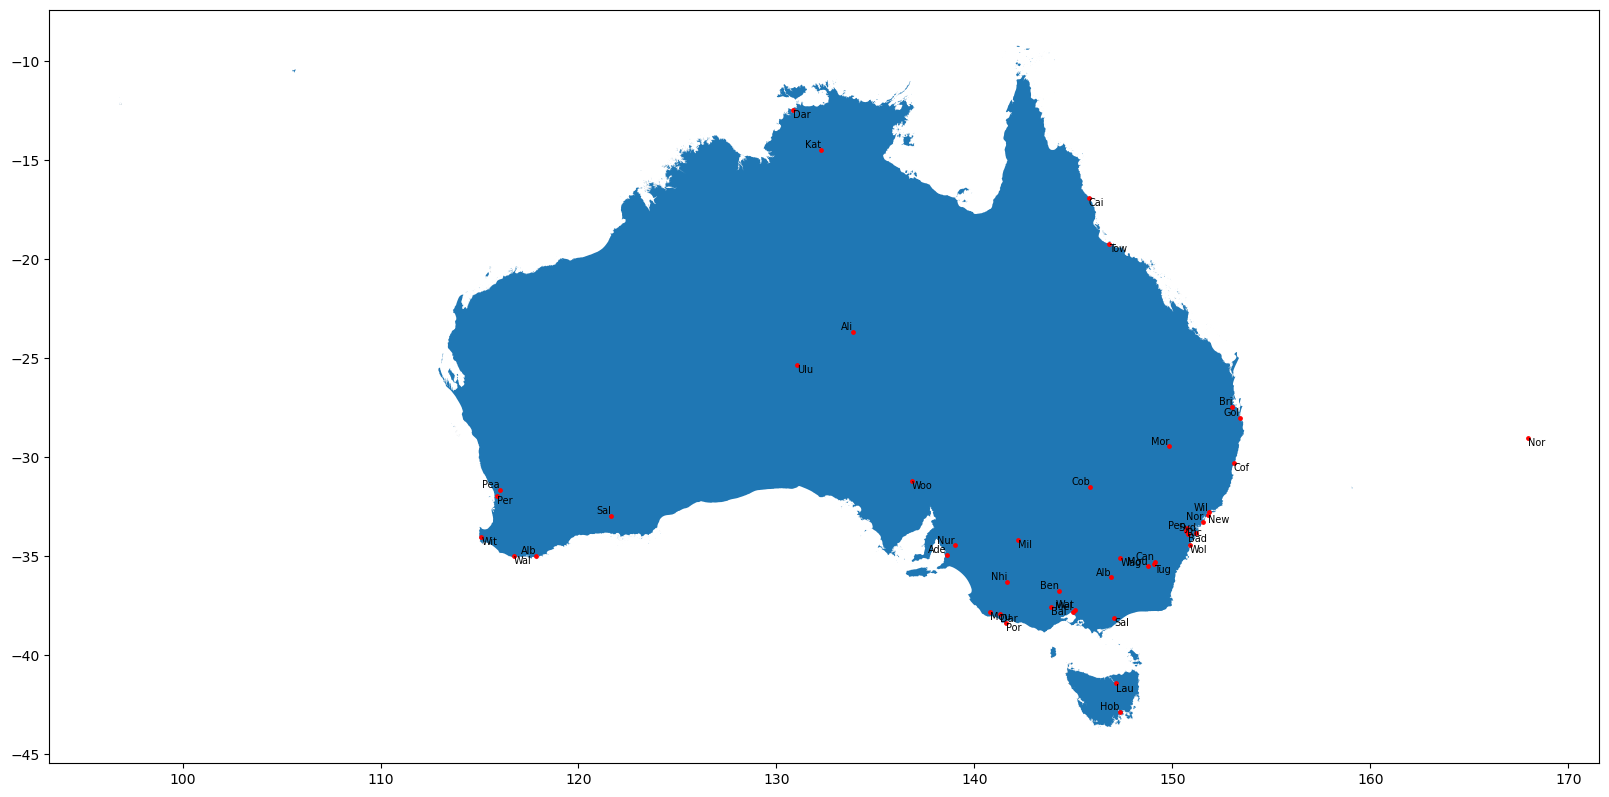

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = "AUS_2021_AUST_GDA2020.shp"


# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Convert coordinates to GeoDataFrame
gdf_coordinates = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[1] for coord in coordinates], [coord[0] for coord in coordinates]))

# Plot the shapefile
ax = gdf.plot(figsize=(20, 20))

# Plot the coordinates
gdf_coordinates.plot(ax=ax, color='red', marker='o', markersize=6)

# Annotate the points with names
counter = 0
for x, y, name in coordinates:
    counter += 1
    ha = 'left' if counter % 2 == 0 else 'right'
    # Alternate vertical alignment
    va = 'top' if counter % 2 == 0 else 'bottom'
    ax.text(y, x,name[:3],fontsize=7, ha=ha, va=va)

Looking at the locations of the data on a map, we can see that most of the locations are concentrated in the Southwest of Australia, maybe it would make sense to seperate the data into several regions.

Also taking the three least rainy locations and the three most rainy locations on the table showing aggregated raindata for each location, looking at the map we can see that the three least rainy locations are inland and the three most rainy locations are all at the seaside. 

Let's now look at the distribution of rainfall on rainy days as the variables RainToday and RainTomorrow are contructed from the rainfall variable

To look at the distribution of rainfall in rainy days we use the same cutoff as the RainToday and RainTomorrow variables, i.e. a rainy day is considered as rainy when 1mm of rain falls 

In [22]:
rainfall = df.loc[df.Rainfall > 1]
rainfall.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
count,31776.000000,31768.000000,31880.000000,17996.000000,16820.000000,29373.000000,31632.000000,31195.000000,31421.000000,30933.000000,28763.000000,28756.000000,21091.000000,20292.000000,31660.000000,31158.000000,31880.0,31455.000000,31880.000000,31880.000000
mean,12.851734,20.194583,10.270354,3.995899,5.313555,43.950805,15.706089,19.958615,81.411731,66.191317,1015.144616,1013.868255,6.019534,5.827370,15.814488,18.644794,1.0,0.464060,6.467158,2012.701631
std,6.003064,6.452752,15.486644,3.675585,3.535938,14.926015,9.452531,9.378466,13.750357,17.458148,7.633648,7.645485,2.268363,2.197331,6.072594,6.296426,0.0,0.498715,3.295298,2.545991
min,-7.800000,-4.800000,1.100000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,1.0,0.000000,1.000000,2007.000000
25%,8.500000,15.500000,2.400000,1.800000,2.300000,33.000000,9.000000,13.000000,72.000000,54.000000,1010.100000,1008.600000,5.000000,4.000000,11.400000,14.100000,1.0,0.000000,4.000000,2010.000000
50%,12.300000,19.300000,5.200000,3.200000,5.400000,43.000000,15.000000,19.000000,84.000000,66.000000,1015.200000,1014.000000,7.000000,7.000000,15.100000,17.900000,1.0,0.000000,6.000000,2013.000000
75%,17.200000,24.400000,11.800000,5.400000,8.100000,52.000000,20.000000,26.000000,93.000000,79.000000,1020.300000,1019.200000,8.000000,8.000000,19.800000,22.700000,1.0,1.000000,9.000000,2015.000000
max,28.300000,46.300000,371.000000,145.000000,14.200000,135.000000,87.000000,87.000000,100.000000,100.000000,1039.000000,1037.800000,9.000000,8.000000,35.800000,44.700000,1.0,1.000000,12.000000,2017.000000


Let's look at boxplot of rainfall on rainy days. We should see a lot outliers.

<Axes: xlabel='Rainfall'>

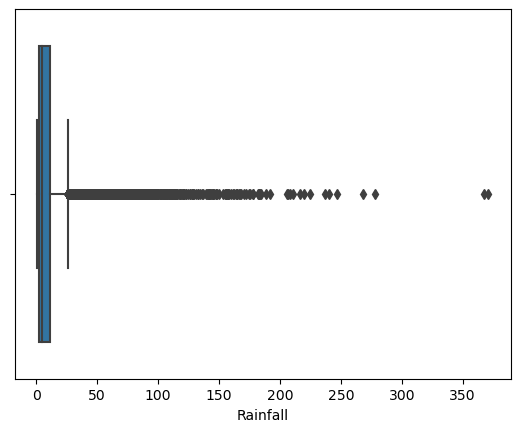

In [23]:
sns.boxplot(data=rainfall, x='Rainfall')

As suspected we see a lot of outliers and a boxplot very concentrated around the median close to 0mm.

Let's graph the distribution and qqplot for rainfall on rainy days to confirm that the data is not evenly distributed

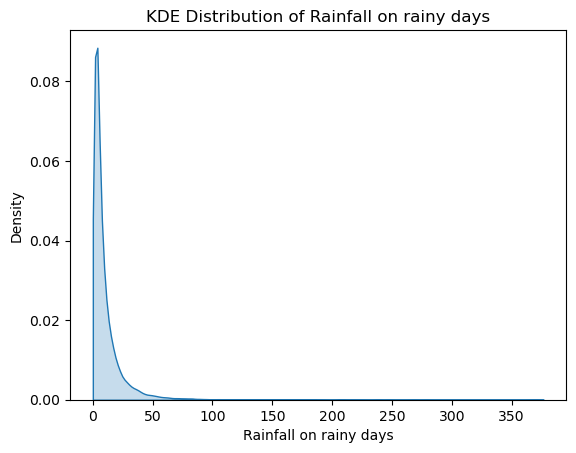

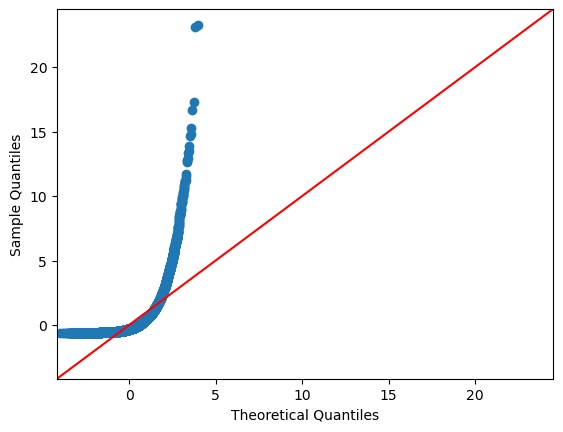

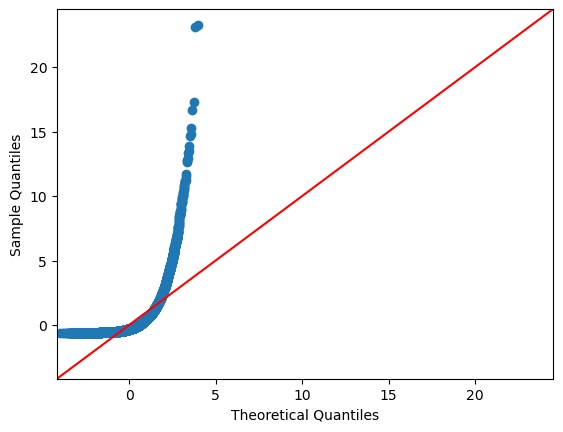

In [68]:
#KDE distribution
sns.kdeplot(data=rainfall.Rainfall, fill=True, clip=(0, None))
plt.title('KDE Distribution of Rainfall on rainy days')
plt.xlabel('Rainfall on rainy days')
plt.ylabel('Density')
plt.show()

#qqplot
import statsmodels.api as sm

# Q-Qplot 
sm.qqplot(rainfall.Rainfall, fit = True, line = '45')

We see that the distribution of rainfall is skewed to the right and highly concentrated on the lower end, where values are close to 0. This is linked to the influence of the extreme values as seen in the boxplot. Maybe in certain location you have ponctual very heavy rainfalls. Or maybe in one year you had a lot more rain than in the other years. 

Let's look at the distribution of rainfall for each unique location. 

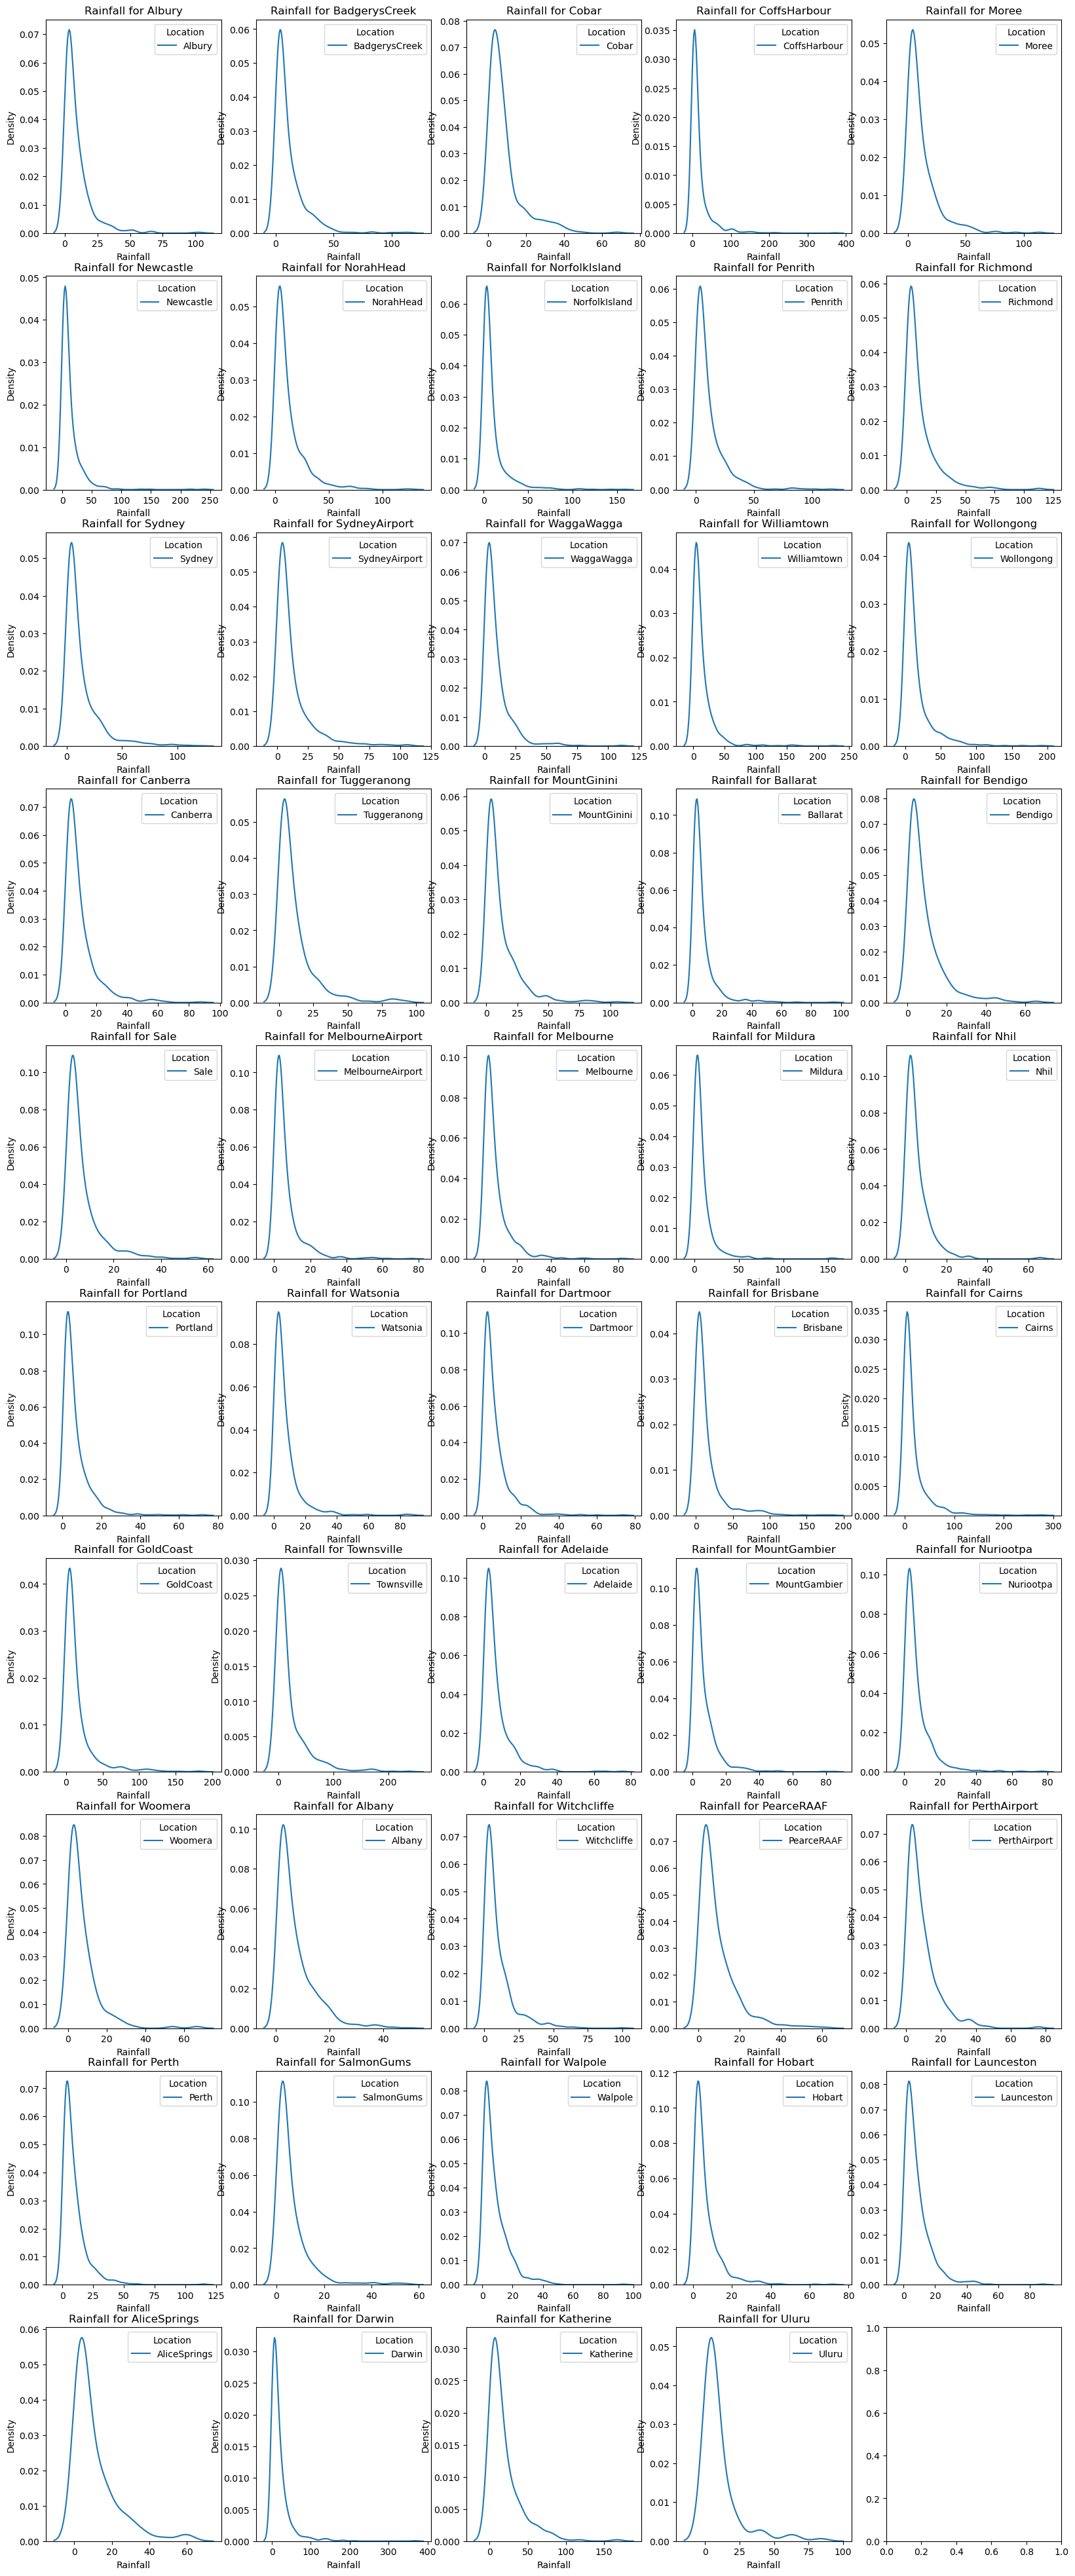

In [70]:
# Calculate the number of rows and columns needed
num_locations = len(rainfall['Location'].unique())
num_cols = 5  # Number of columns for the subplots
num_rows = (num_locations + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the array for easy iteration
axs = axs.flatten()

for i,location in enumerate(rainfall['Location'].unique()):
    data = rainfall.loc[rainfall.Location == location]
    sns.kdeplot(data=data, x='Rainfall', label=location, ax=axs[i])
    axs[i].set_title(f'Rainfall for {location}')
    axs[i].set_xlabel('Rainfall')
    axs[i].set_ylabel('Density')
    axs[i].legend(title='Location')

The locations CoffsHarbour, Cairns, Darwin some very high rainfall on rainy days with values of 300mm 

Let's also look at the extreme values of rainfall on rainy days and see if the extreme values match these two locations. 

To check for extreme values look at: 

An extreme value (or outlier) is any value 
        above  𝑄3+1.5∗(𝑄3−𝑄1)
        below  𝑄1−1.5∗(𝑄3−𝑄1)

In [26]:
rainfall.Rainfall.describe()

count    31880.000000
mean        10.270354
std         15.486644
min          1.100000
25%          2.400000
50%          5.200000
75%         11.800000
max        371.000000
Name: Rainfall, dtype: float64

In [27]:
q1 = rainfall.Rainfall.quantile(q=0.25)
q3 = rainfall.Rainfall.quantile(q=0.75)
threshold_below = q3+1.5*(q3-q1)
threshold_above = q1-1.5*(q3-q1)
df_extreme_low = rainfall.loc[(rainfall['Rainfall'] < threshold_below)]
df_extreme_above = rainfall.loc[(rainfall['Rainfall'] > threshold_below)]
print(df_extreme_low.shape)
print(df_extreme_above.shape)

(29132, 25)
(2748, 25)


In [28]:
df_extreme_above.groupby('Location').aggregate({'RainTomorrow':'sum','Rainfall':'sum'}).sort_values(by='Rainfall',ascending=False)

,RainTomorrow,Rainfall
Location,,
Cairns,156.0,11592.0
Darwin,129.0,9728.8
CoffsHarbour,111.0,9485.9
Townsville,92.0,7771.4
GoldCoast,73.0,6264.2
Wollongong,86.0,6129.0
Brisbane,55.0,5409.6
Sydney,85.0,5372.2
NorahHead,76.0,4510.8


As before we can see that Cairns and Darwin as well as CoffsHarbour really stick out, i.e. get more rain than the rest. 

Let's also look at rainfall by year

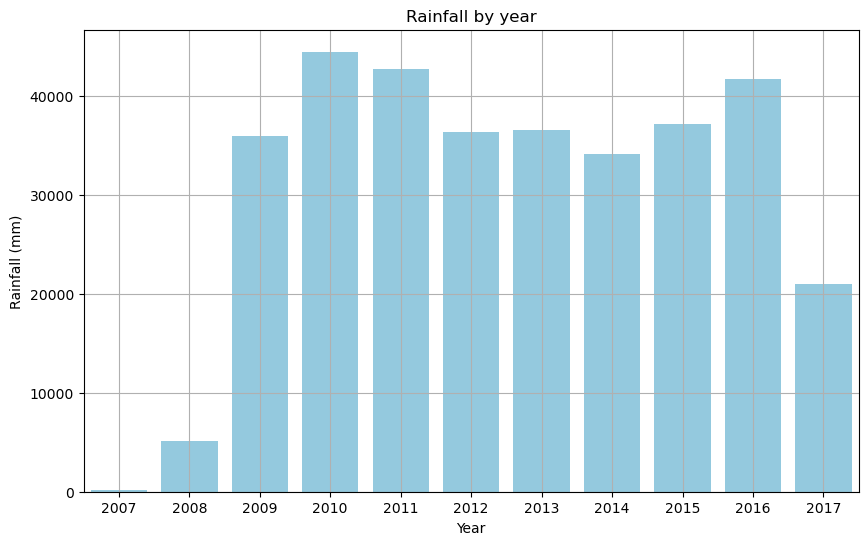

In [29]:
plt.figure(figsize=(10, 6))
rainfall_by_year = df.groupby('Year').aggregate({'Rainfall': 'sum'}) 
sns.barplot(x=rainfall_by_year.index, y='Rainfall', data=rainfall_by_year, color='skyblue')
plt.title('Rainfall by year')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

While it seems normal that year 2007 and 2017 has significantly less rainfall because in 2007 we start having data from November on and in 2017, we start having data only till 2017,the year 2008 looks very unormal. 

Let's have a closer look at 2008, maybe all the missing data is from 2008. 

In [30]:
df['Year'] = df.Date.dt.year
nan_values = df.isna().sum()
nan_values_2008 = df.loc[df.Year==2008].isna().sum()
print(nan_values)
print(nan_values_2008)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Year                 0
dtype: int64
Date               0
Location           0
MinTemp           11
MaxTemp            8
Rainfall          25
Evaporation      339
Sunshine         323
WindGustDir      453
WindGustSpeed    452
WindDir9am        92
WindDir3pm        23
WindSpeed9am      30
WindSpeed3pm      19
Humidity9am       25
Humidity3pm       23
Pressure9am       95
Pressure3pm       94
Cloud9am         379
Cloud3pm         389
Temp9am      

It doesn't seem that there are more NaN values in 2008

Let's check whether this is linked to the number of locations for 2008. Are they different from those in 2009 and 2010 ? 

In [40]:
#Cross check on the year 2008

df_2008 = df.loc[df.Year == 2008]
print(len(df_2008.Location.unique()))
df_2009 = df.loc[df.Year == 2009]
print(len(df_2009.Location.unique()))

df_2010 = df.loc[df.Year == 2010]
print(len(df_2010.Location.unique()))

23
46
46


As we can see in 2008 less locations are taken into account. So maybe that explains why the accumulated rainfall data is so low for 2008. Let's look at only the location from 2008 and check if the rainfall data in 2008 is still lower compared to other years

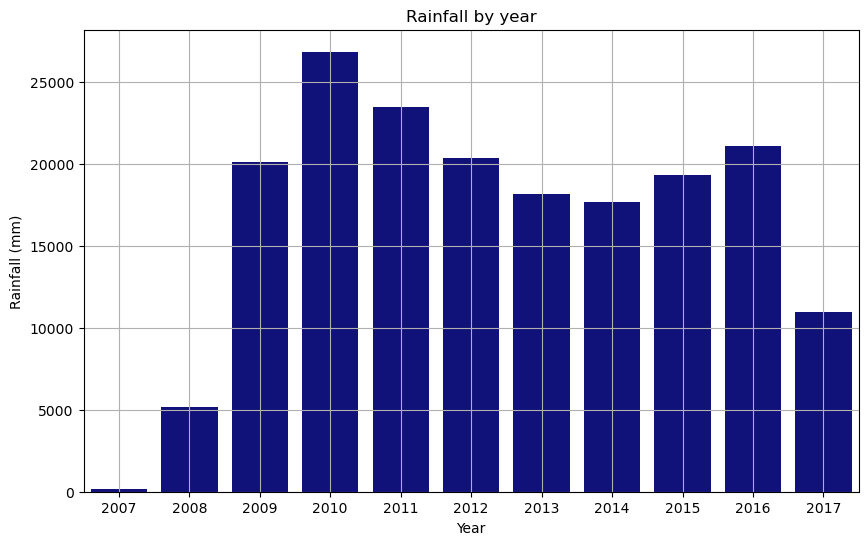

Month
Location   Year                                         
Adelaide   2008                    [7, 8, 9, 10, 11, 12]
           2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
           2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
...                                                  ...
Wollongong 2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           2017                       [1, 2, 3, 4, 5, 6]

[231 rows x 1 columns]

In [59]:
unique_locations_2008 = df_2008['Location'].unique()

# Filtering df based on unique locations in df_2008 for the year 2008
df_locations_2008 = df[df['Location'].isin(unique_locations_2008)]

#group df_locations_2008 by year and graph distrbution over year
plt.figure(figsize=(10, 6))
rainfall_by_year = df_locations_2008.groupby('Year').aggregate({'Rainfall': 'sum'}) 
sns.barplot(x=rainfall_by_year.index, y='Rainfall', data=rainfall_by_year, color='darkblue')
plt.title('Rainfall by year')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

Even if we look at only the locations of 2008 we get the same result. So let's check wheather all 23 locations of 2008 have data for all 12 months

In [66]:
df_locations_2008.groupby(['Location', 'Year']).aggregate({'Month': 'unique'}).head(50)

Month
Location     Year                                         
Adelaide     2008                    [7, 8, 9, 10, 11, 12]
             2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
             2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
             2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2017                       [1, 2, 3, 4, 5, 6]
Albany       2008                                     [12]
             2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
             2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
             2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2017                       [1, 2, 3, 4, 5, 6]
Albury       2008                                     [12]
             2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
             2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
             2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2017                       [1, 2, 3, 4, 5, 6]
AliceSprings 2008                                     [12]
             2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
             2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
             2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2017                       [1, 2, 3, 4, 5, 6]
Ballarat     2008                                     [12]
             2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
             2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
             2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
             2017                       [1, 2, 3, 4, 5, 6]

Looking closer at month for each other. We can see several things. 

First, indeed a lot of locations have missing months in 2008, some have data for 6 months, some only for 1 month 

Second all the locations seem to have not data for all the months in 2011, 2012, 2013

In 2011 April has no data, in 2012 December has no data, in 2013 February has no data

Having this in mind the barplot showing rainfall over the years, cannot be trusted. Maybe we need to look at years having data for all months for all locations, to see any interesting trend. 

### Correlations 

Let's look at the correlation matrix first

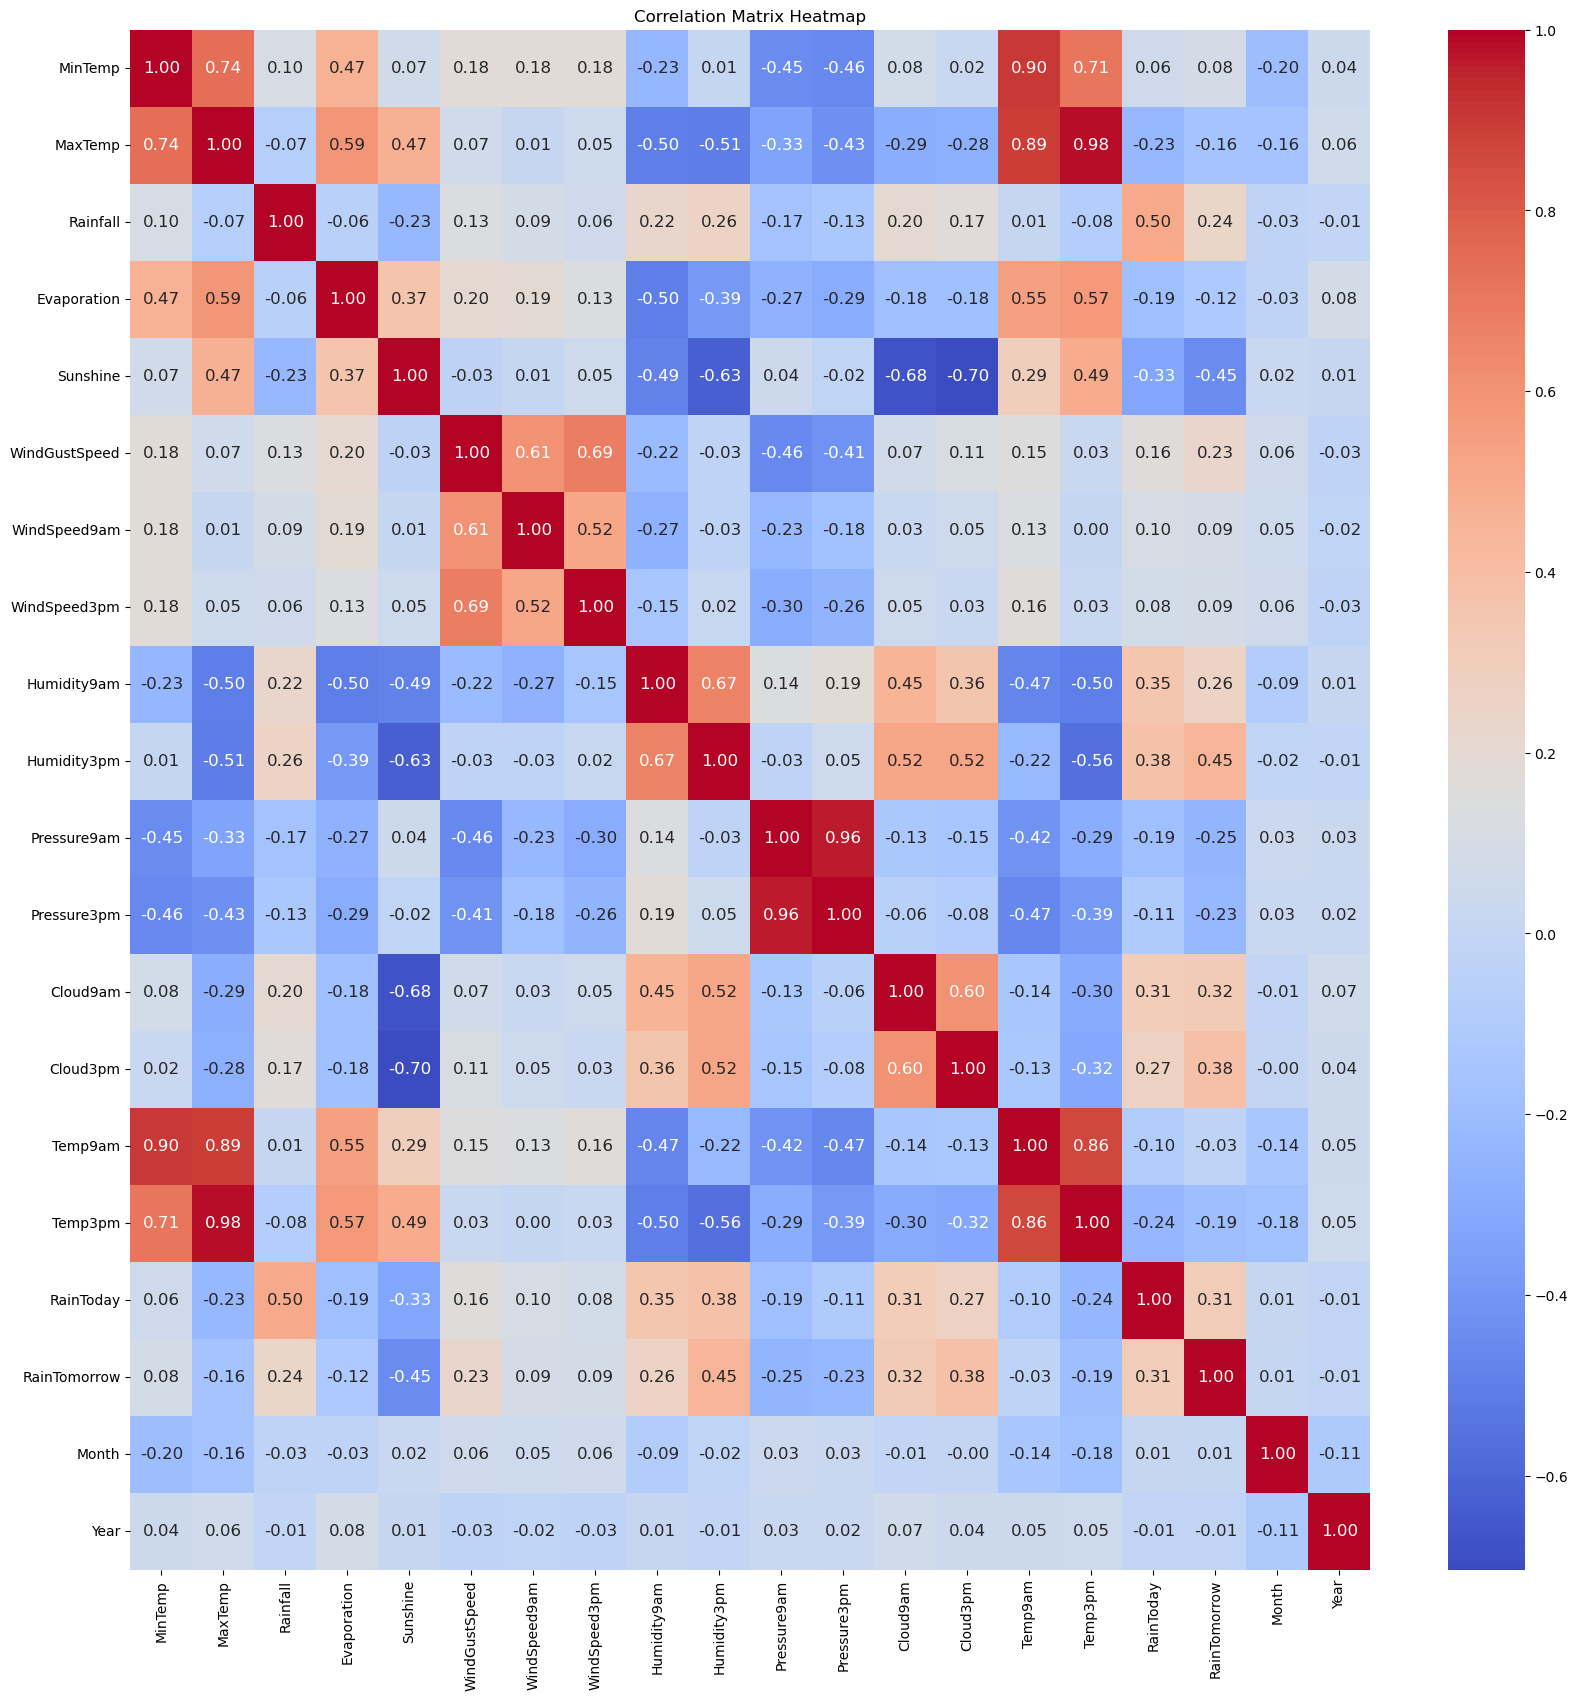

In [103]:
corr_matrix = df.select_dtypes(include=['float', 'int']).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 12})
plt.title('Correlation Matrix Heatmap')
plt.show()

**Missing Values**

What to do about missing sunshine and humidity data ? 

Drop 2007,2008 or not ? 

KK neighbors -> to predict missing values (as some locations very close)


**Outliers**
For rainfall, look at outliers for rainfall only on the days when it is raining

humidity == 0 ? Outlier or not

evaporation == 0 ? Outlier or not


**Putting Features together** 

Features Cloud 3am, 9am  --> take average to have one cloud variable  (same for wind)

Send Report by Tuesday 
Next meeting 6pm Wednesday